In [1]:
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

In [2]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_set = datasets.CIFAR10(
    root='/data/nieruichen/Deep-Learning-Intro-Assignments/CIFAR10_data',
    train=True,
    download=True,
    transform=transform
)
test_set = datasets.CIFAR10(
    root='/data/nieruichen/Deep-Learning-Intro-Assignments/CIFAR10_data',
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

定义训练和测试函数

In [15]:
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in tqdm(train_loader, desc="Train"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    return running_loss / total, correct / total

def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Test"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return running_loss / total, correct / total

纯MLP模型

In [15]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 256)   # 输入层到隐藏层
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(256, 10)      # 隐藏层到输出层

    def forward(self, x):
        x = x.view(x.size(0), -1)          # 展平成(batch, 784)
        x = self.sigmoid(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)             # 如果用CrossEntropyLoss，这一行建议注释掉
        return x

Train:   0%|          | 0/782 [00:00<?, ?it/s]

Test: 100%|██████████| 157/157 [00:01<00:00, 93.63it/s]


Epoch 1/15 | Train Loss: 2.1385 Acc: 0.3036 | Test Loss: 2.0786 Acc: 0.3357


Test: 100%|██████████| 157/157 [00:01<00:00, 95.07it/s]


Epoch 2/15 | Train Loss: 2.0578 Acc: 0.3518 | Test Loss: 2.0435 Acc: 0.3597


Test: 100%|██████████| 157/157 [00:01<00:00, 95.81it/s]


Epoch 3/15 | Train Loss: 2.0309 Acc: 0.3654 | Test Loss: 2.0243 Acc: 0.3715


Test: 100%|██████████| 157/157 [00:01<00:00, 91.88it/s]


Epoch 4/15 | Train Loss: 2.0145 Acc: 0.3754 | Test Loss: 2.0112 Acc: 0.3772


Test: 100%|██████████| 157/157 [00:01<00:00, 93.20it/s]


Epoch 5/15 | Train Loss: 2.0026 Acc: 0.3835 | Test Loss: 2.0017 Acc: 0.3839


Test: 100%|██████████| 157/157 [00:01<00:00, 97.05it/s]


Epoch 6/15 | Train Loss: 1.9936 Acc: 0.3890 | Test Loss: 1.9950 Acc: 0.3863


Test: 100%|██████████| 157/157 [00:01<00:00, 98.49it/s]


Epoch 7/15 | Train Loss: 1.9862 Acc: 0.3932 | Test Loss: 1.9892 Acc: 0.3962


Test: 100%|██████████| 157/157 [00:01<00:00, 99.14it/s]


Epoch 8/15 | Train Loss: 1.9801 Acc: 0.3977 | Test Loss: 1.9847 Acc: 0.3980


Test: 100%|██████████| 157/157 [00:01<00:00, 98.82it/s]


Epoch 9/15 | Train Loss: 1.9749 Acc: 0.4017 | Test Loss: 1.9812 Acc: 0.4002


Test: 100%|██████████| 157/157 [00:01<00:00, 98.86it/s]


Epoch 10/15 | Train Loss: 1.9704 Acc: 0.4052 | Test Loss: 1.9781 Acc: 0.4022


Test: 100%|██████████| 157/157 [00:01<00:00, 99.33it/s]


Epoch 11/15 | Train Loss: 1.9661 Acc: 0.4087 | Test Loss: 1.9746 Acc: 0.4053


Test: 100%|██████████| 157/157 [00:01<00:00, 98.27it/s]


Epoch 12/15 | Train Loss: 1.9624 Acc: 0.4118 | Test Loss: 1.9730 Acc: 0.4095


Test: 100%|██████████| 157/157 [00:01<00:00, 98.42it/s]


Epoch 13/15 | Train Loss: 1.9590 Acc: 0.4147 | Test Loss: 1.9702 Acc: 0.4098


Test: 100%|██████████| 157/157 [00:01<00:00, 98.28it/s]


Epoch 14/15 | Train Loss: 1.9558 Acc: 0.4162 | Test Loss: 1.9685 Acc: 0.4104


Test: 100%|██████████| 157/157 [00:01<00:00, 98.73it/s]


Epoch 15/15 | Train Loss: 1.9528 Acc: 0.4199 | Test Loss: 1.9670 Acc: 0.4126


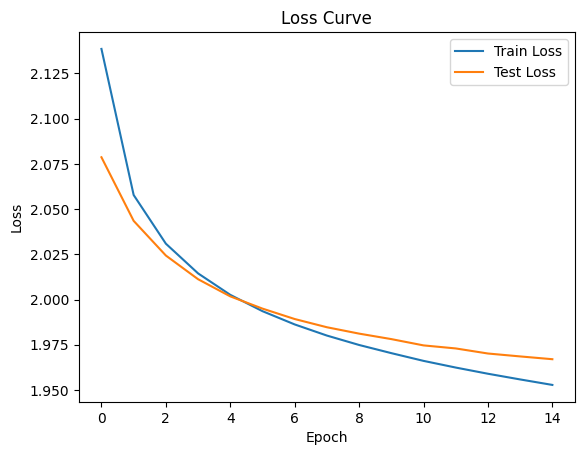

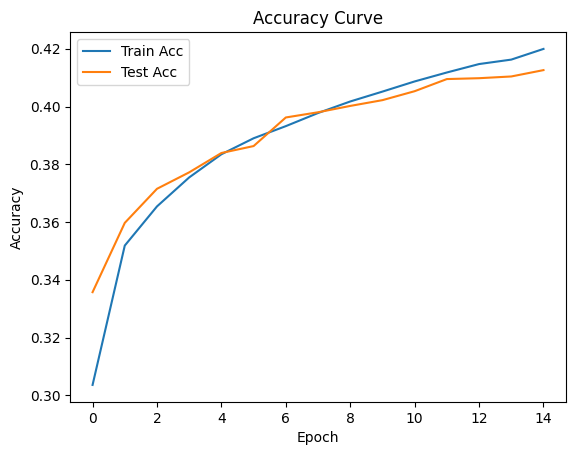

In [18]:
# 实例化模型
model = MLP().to(device)

# 优化器和损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

纯CNN模型

In [19]:
class PureCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, 1)
        self.sigmoid = nn.Sigmoid()
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.conv3 = nn.Conv2d(32, 10, 8, 1, 0)  
        self.gap = nn.AdaptiveAvgPool2d(1)  # GAP

    def forward(self, x):
        x = self.pool(self.sigmoid(self.conv1(x)))
        x = self.pool(self.sigmoid(self.conv2(x)))
        x = self.conv3(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)  # (batch, 10)
        return x

Test: 100%|██████████| 157/157 [00:01<00:00, 91.70it/s]


Epoch 1/15 | Train Loss: 2.0988 Acc: 0.2389 | Test Loss: 1.9017 Acc: 0.3388


Test: 100%|██████████| 157/157 [00:01<00:00, 93.52it/s]


Epoch 2/15 | Train Loss: 1.8300 Acc: 0.3496 | Test Loss: 1.7655 Acc: 0.3754


Test: 100%|██████████| 157/157 [00:01<00:00, 93.18it/s]


Epoch 3/15 | Train Loss: 1.7119 Acc: 0.3949 | Test Loss: 1.7066 Acc: 0.3872


Test: 100%|██████████| 157/157 [00:01<00:00, 92.90it/s]


Epoch 4/15 | Train Loss: 1.6302 Acc: 0.4247 | Test Loss: 1.7140 Acc: 0.3960


Test: 100%|██████████| 157/157 [00:01<00:00, 93.43it/s]


Epoch 5/15 | Train Loss: 1.5622 Acc: 0.4503 | Test Loss: 1.5586 Acc: 0.4429


Test: 100%|██████████| 157/157 [00:01<00:00, 93.88it/s]


Epoch 6/15 | Train Loss: 1.4994 Acc: 0.4709 | Test Loss: 1.6028 Acc: 0.4125


Test: 100%|██████████| 157/157 [00:01<00:00, 92.28it/s]


Epoch 7/15 | Train Loss: 1.4356 Acc: 0.4901 | Test Loss: 1.4045 Acc: 0.4950


Test: 100%|██████████| 157/157 [00:01<00:00, 87.49it/s]


Epoch 8/15 | Train Loss: 1.3784 Acc: 0.5072 | Test Loss: 1.4881 Acc: 0.4615


Test: 100%|██████████| 157/157 [00:01<00:00, 91.02it/s]


Epoch 9/15 | Train Loss: 1.3277 Acc: 0.5266 | Test Loss: 1.4501 Acc: 0.4627


Test: 100%|██████████| 157/157 [00:01<00:00, 95.35it/s]


Epoch 10/15 | Train Loss: 1.2836 Acc: 0.5466 | Test Loss: 1.3050 Acc: 0.5274


Test: 100%|██████████| 157/157 [00:01<00:00, 94.06it/s]


Epoch 11/15 | Train Loss: 1.2478 Acc: 0.5582 | Test Loss: 1.2838 Acc: 0.5371


Test: 100%|██████████| 157/157 [00:01<00:00, 89.11it/s]


Epoch 12/15 | Train Loss: 1.2173 Acc: 0.5694 | Test Loss: 1.3231 Acc: 0.5205


Test: 100%|██████████| 157/157 [00:01<00:00, 92.94it/s]


Epoch 13/15 | Train Loss: 1.1894 Acc: 0.5782 | Test Loss: 1.4648 Acc: 0.4876


Test: 100%|██████████| 157/157 [00:01<00:00, 93.10it/s]


Epoch 14/15 | Train Loss: 1.1660 Acc: 0.5908 | Test Loss: 1.2099 Acc: 0.5682


Test: 100%|██████████| 157/157 [00:01<00:00, 91.96it/s]


Epoch 15/15 | Train Loss: 1.1427 Acc: 0.5975 | Test Loss: 1.1962 Acc: 0.5771


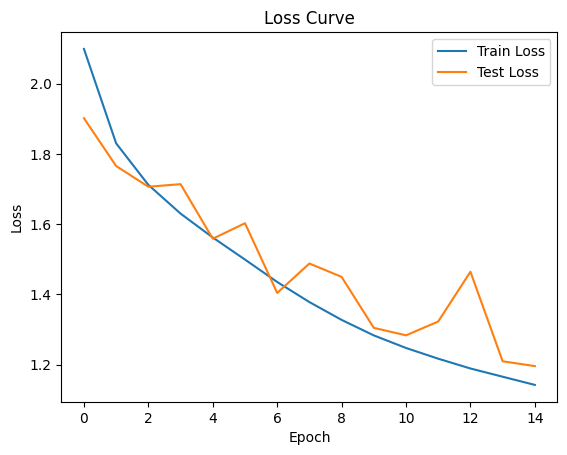

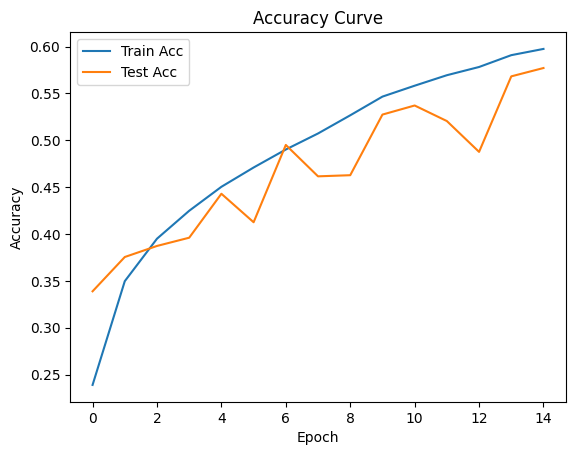

In [20]:
# 实例化模型
model = PureCNN().to(device)

# 优化器和损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()

# 训练与测试
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [8]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)  # 32x32 -> 16x16 -> 8x8
        self.fc2 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [11]:
# 3. 训练与测试
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for images, labels in train_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20: 100%|██████████| 782/782 [00:10<00:00, 75.10it/s]


Epoch 1/20, Loss: 1.2908


Epoch 2/20: 100%|██████████| 782/782 [00:09<00:00, 84.02it/s]


Epoch 2/20, Loss: 0.9360


Epoch 3/20: 100%|██████████| 782/782 [00:09<00:00, 83.92it/s]


Epoch 3/20, Loss: 0.7793


Epoch 4/20: 100%|██████████| 782/782 [00:10<00:00, 75.56it/s]


Epoch 4/20, Loss: 0.6647


Epoch 5/20: 100%|██████████| 782/782 [00:09<00:00, 81.11it/s]


Epoch 5/20, Loss: 0.5636


Epoch 6/20: 100%|██████████| 782/782 [00:10<00:00, 75.04it/s]


Epoch 6/20, Loss: 0.4678


Epoch 7/20: 100%|██████████| 782/782 [00:10<00:00, 75.79it/s]


Epoch 7/20, Loss: 0.3863


Epoch 8/20: 100%|██████████| 782/782 [00:10<00:00, 75.04it/s]


Epoch 8/20, Loss: 0.3203


Epoch 9/20: 100%|██████████| 782/782 [00:10<00:00, 76.83it/s]


Epoch 9/20, Loss: 0.2713


Epoch 10/20: 100%|██████████| 782/782 [00:10<00:00, 76.82it/s]


Epoch 10/20, Loss: 0.2339


Epoch 11/20: 100%|██████████| 782/782 [00:09<00:00, 83.02it/s]


Epoch 11/20, Loss: 0.2083


Epoch 12/20: 100%|██████████| 782/782 [00:10<00:00, 76.99it/s]


Epoch 12/20, Loss: 0.1880


Epoch 13/20: 100%|██████████| 782/782 [00:09<00:00, 86.10it/s]


Epoch 13/20, Loss: 0.1701


Epoch 14/20: 100%|██████████| 782/782 [00:10<00:00, 76.60it/s]


Epoch 14/20, Loss: 0.1561


Epoch 15/20: 100%|██████████| 782/782 [00:09<00:00, 85.80it/s]


Epoch 15/20, Loss: 0.1489


Epoch 16/20: 100%|██████████| 782/782 [00:10<00:00, 77.68it/s]


Epoch 16/20, Loss: 0.1421


Epoch 17/20: 100%|██████████| 782/782 [00:10<00:00, 75.47it/s]


Epoch 17/20, Loss: 0.1292


Epoch 18/20: 100%|██████████| 782/782 [00:10<00:00, 76.29it/s]


Epoch 18/20, Loss: 0.1258


Epoch 19/20: 100%|██████████| 782/782 [00:10<00:00, 77.22it/s]


Epoch 19/20, Loss: 0.1216


Epoch 20/20: 100%|██████████| 782/782 [00:10<00:00, 76.36it/s]

Epoch 20/20, Loss: 0.1174


In [12]:
# 4. 测试
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 72.75%


In [21]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # 如果输入通道数和输出通道数不同，或者stride不为1，则需要调整输入的尺寸
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    def forward(self, x):
        identity = self.shortcut(x)  # 残差分支
        out = self.relu(self.bn1(self.conv1(x)))  # 主分支
        out = self.bn2(self.conv2(out))
        out += identity  # 主分支 + 残差分支
        out = self.relu(out)
        return out

In [22]:
class DeepResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(DeepResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        # ResNet Blocks
        self.layer1 = self._make_layer(64, 64, num_blocks=2, stride=1)
        self.layer2 = self._make_layer(64, 128, num_blocks=2, stride=2)
        self.layer3 = self._make_layer(128, 256, num_blocks=2, stride=2)
        self.layer4 = self._make_layer(256, 512, num_blocks=2, stride=2)

        # Fully Connected Layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5) 

    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResNetBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResNetBlock(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [ ]:
model = DeepResNet(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for images, labels in train_bar:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # 计算训练集准确率
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")

Epoch 1/10: 100%|██████████| 782/782 [00:20<00:00, 38.38it/s]


Epoch 1/10, Loss: 1.4212, Train Accuracy: 48.57%


Epoch 2/10: 100%|██████████| 782/782 [00:20<00:00, 38.31it/s]


Epoch 2/10, Loss: 0.9047, Train Accuracy: 68.19%


Epoch 3/10: 100%|██████████| 782/782 [00:20<00:00, 38.36it/s]


Epoch 3/10, Loss: 0.7039, Train Accuracy: 75.78%


Epoch 4/10: 100%|██████████| 782/782 [00:20<00:00, 38.23it/s]


Epoch 4/10, Loss: 0.5910, Train Accuracy: 79.77%


Epoch 5/10: 100%|██████████| 782/782 [00:20<00:00, 37.80it/s]


Epoch 5/10, Loss: 0.5110, Train Accuracy: 82.47%


Epoch 6/10: 100%|██████████| 782/782 [00:23<00:00, 33.83it/s]


Epoch 6/10, Loss: 0.4389, Train Accuracy: 85.00%


Epoch 7/10: 100%|██████████| 782/782 [00:23<00:00, 33.68it/s]


Epoch 7/10, Loss: 0.3803, Train Accuracy: 87.05%


Epoch 8/10: 100%|██████████| 782/782 [00:23<00:00, 33.46it/s]


Epoch 8/10, Loss: 0.3209, Train Accuracy: 89.07%


Epoch 9/10: 100%|██████████| 782/782 [00:23<00:00, 33.13it/s]


Epoch 9/10, Loss: 0.2750, Train Accuracy: 90.45%


Epoch 10/10: 100%|██████████| 782/782 [00:23<00:00, 33.31it/s]

Epoch 10/10, Loss: 0.2318, Train Accuracy: 92.08%


In [14]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 84.14%


Test: 100%|██████████| 157/157 [00:02<00:00, 65.82it/s]


Epoch 1/15 | Train Loss: 1.3987 Acc: 0.4927 | Test Loss: 1.0392 Acc: 0.6287


Test: 100%|██████████| 157/157 [00:02<00:00, 69.30it/s]


Epoch 2/15 | Train Loss: 0.9053 Acc: 0.6807 | Test Loss: 0.9074 Acc: 0.6812


Test: 100%|██████████| 157/157 [00:02<00:00, 69.41it/s]


Epoch 3/15 | Train Loss: 0.7050 Acc: 0.7573 | Test Loss: 0.6585 Acc: 0.7742


Test: 100%|██████████| 157/157 [00:02<00:00, 66.72it/s]


Epoch 4/15 | Train Loss: 0.5897 Acc: 0.7985 | Test Loss: 0.6476 Acc: 0.7761


Test: 100%|██████████| 157/157 [00:02<00:00, 69.22it/s]


Epoch 5/15 | Train Loss: 0.5096 Acc: 0.8259 | Test Loss: 0.5316 Acc: 0.8192


Test: 100%|██████████| 157/157 [00:02<00:00, 69.49it/s]


Epoch 6/15 | Train Loss: 0.4482 Acc: 0.8474 | Test Loss: 0.6406 Acc: 0.7854


Test: 100%|██████████| 157/157 [00:02<00:00, 69.20it/s]


Epoch 7/15 | Train Loss: 0.3863 Acc: 0.8674 | Test Loss: 0.5780 Acc: 0.8144


Test: 100%|██████████| 157/157 [00:02<00:00, 69.09it/s]


Epoch 8/15 | Train Loss: 0.3300 Acc: 0.8865 | Test Loss: 0.5482 Acc: 0.8217


Test: 100%|██████████| 157/157 [00:02<00:00, 65.90it/s]


Epoch 9/15 | Train Loss: 0.2850 Acc: 0.9029 | Test Loss: 0.4717 Acc: 0.8418


Test: 100%|██████████| 157/157 [00:02<00:00, 69.52it/s]


Epoch 10/15 | Train Loss: 0.2457 Acc: 0.9155 | Test Loss: 0.5816 Acc: 0.8224


Test: 100%|██████████| 157/157 [00:02<00:00, 69.69it/s]


Epoch 11/15 | Train Loss: 0.2091 Acc: 0.9283 | Test Loss: 0.5562 Acc: 0.8283


Test: 100%|██████████| 157/157 [00:02<00:00, 66.30it/s]


Epoch 12/15 | Train Loss: 0.1818 Acc: 0.9384 | Test Loss: 0.5345 Acc: 0.8402


Test: 100%|██████████| 157/157 [00:02<00:00, 70.44it/s]


Epoch 13/15 | Train Loss: 0.1644 Acc: 0.9444 | Test Loss: 0.5583 Acc: 0.8367


Test: 100%|██████████| 157/157 [00:02<00:00, 69.99it/s]


Epoch 14/15 | Train Loss: 0.1511 Acc: 0.9487 | Test Loss: 0.5122 Acc: 0.8483


Test: 100%|██████████| 157/157 [00:02<00:00, 69.86it/s]


Epoch 15/15 | Train Loss: 0.1298 Acc: 0.9553 | Test Loss: 0.5506 Acc: 0.8460


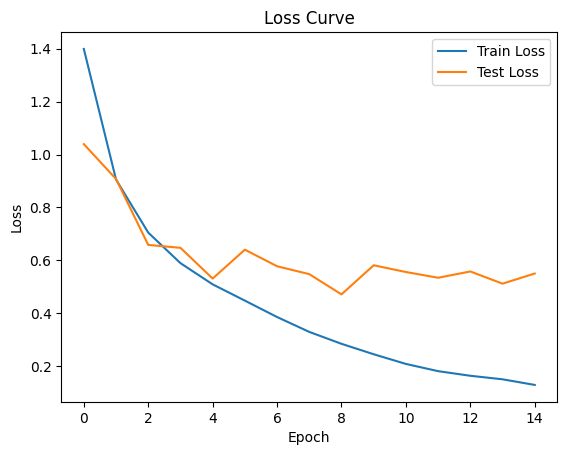

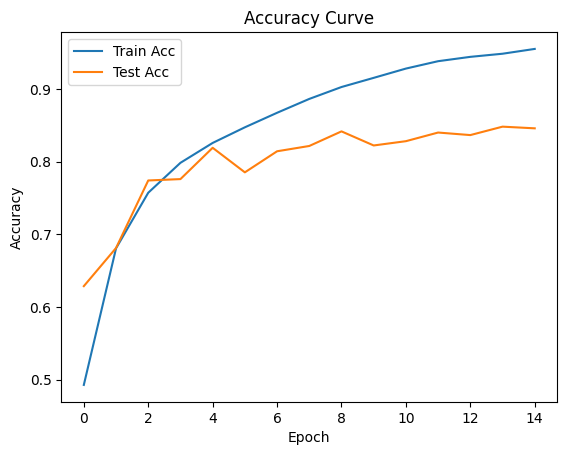

In [24]:
# 训练与测试
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepResNet(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
epochs = 15
train_loss_list, train_acc_list, test_loss_list, test_acc_list = [], [], [], []
for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} Acc: {test_acc:.4f}")

# 绘制loss和accuracy曲线
plt.figure()
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.figure()
plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()